<a href="https://colab.research.google.com/github/NataSamo/Python-ML/blob/main/keras2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 28s 0us/step


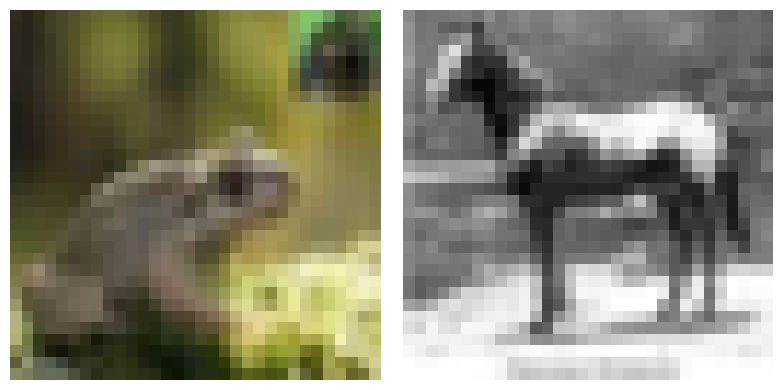

In [ ]:
class_names = ['самолет', 'автомобиль', 'птица', 'кот', 'олень',
               'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']


index1 = tf.random.uniform([], minval=0, maxval=len(x_train), dtype=tf.int32)
index2 = tf.random.uniform([], minval=0, maxval=len(x_train), dtype=tf.int32)


plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(x_train[index1])
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(x_train[index2])

plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [ ]:
def create_cnn_model(filters, kernel_size, pool_size, dropout_rate):
  model = keras.Sequential()
  # Свёрточный слой
  model.add(layers.Conv2D(filters, kernel_size, activation='relu', input_shape=(32, 32, 3)))
  model.add(layers.MaxPooling2D(pool_size))
  # Свёрточный слой
  model.add(layers.Conv2D(filters * 2, kernel_size, activation='relu'))
  model.add(layers.MaxPooling2D(pool_size))
  # Сглаживание
  model.add(layers.Flatten())
  # Полносвязный слой
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dropout(dropout_rate))
  # Выходной слой
  model.add(layers.Dense(10, activation='softmax'))
  model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  return model

In [ ]:
def train_and_evaluate(model, epochs=10, patience=3):
  early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=patience, restore_best_weights=True)
  history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test), callbacks=[early_stopping])
  _, accuracy = model.evaluate(x_test, y_test, verbose=0)
  return accuracy, history

In [ ]:
models = [
  ('Модель 1', create_cnn_model(32, (3, 3), (2, 2), 0.2)),
  ('Модель 2', create_cnn_model(64, (5, 5), (3, 3), 0.3)),
]

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
results = []
for name, model in models:
  accuracy, history = train_and_evaluate(model)
  results.append((name, accuracy, history))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.3795 - loss: 1.7056 - val_accuracy: 0.5677 - val_loss: 1.2236
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5883 - loss: 1.1645 - val_accuracy: 0.6496 - val_loss: 1.0015
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6430 - loss: 1.0068 - val_accuracy: 0.6614 - val_loss: 0.9690
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6780 - loss: 0.9142 - val_accuracy: 0.6816 - val_loss: 0.9244
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7089 - loss: 0.8306 - val_accuracy: 0.6999 - val_loss: 0.8653
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7343 - loss: 0.7570 - val_accuracy: 0.7079 - val_loss: 0.8682
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7522 - loss: 0.7000 - val_accuracy: 0.6998 - val_loss: 0.8786
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7719 - loss: 0.6460

Модель: Модель 1, Точность: 0.7124


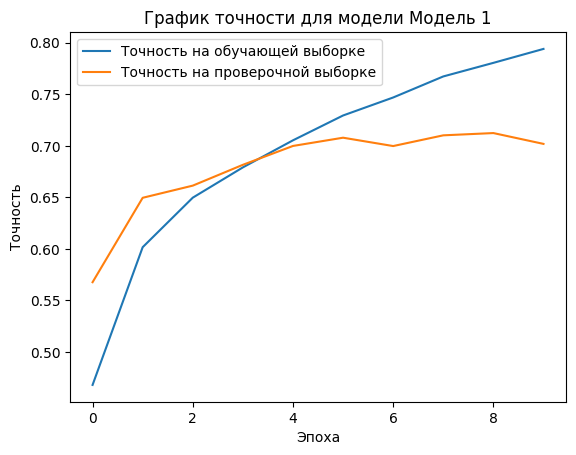

Модель: Модель 2, Точность: 0.6341


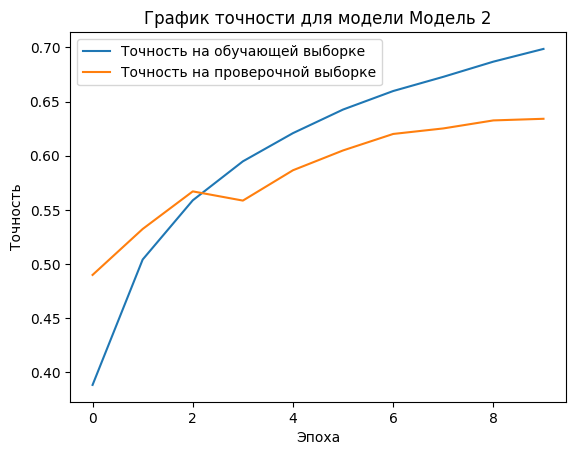

In [ ]:
for name, accuracy, history in results:
  print(f'Модель: {name}, Точность: {accuracy:.4f}')
  plt.plot(history.history['accuracy'], label='Точность на обучающей выборке')
  plt.plot(history.history['val_accuracy'], label='Точность на проверочной выборке')
  plt.xlabel('Эпоха')
  plt.ylabel('Точность')
  plt.title(f'График точности для модели {name}')
  plt.legend()
  plt.show()

In [ ]:
def train_and_evaluate_20(model, epochs=20, patience=3):
  early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=patience, restore_best_weights=True)
  history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test), callbacks=[early_stopping])
  _, accuracy = model.evaluate(x_test, y_test, verbose=0)
  return accuracy, history

In [ ]:
results = []
for name, model in models:
  accuracy, history = train_and_evaluate_20(model)
  results.append((name, accuracy, history))

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.3589 - loss: 1.7495 - val_accuracy: 0.5753 - val_loss: 1.1931
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.5705 - loss: 1.2066 - val_accuracy: 0.6381 - val_loss: 1.0436
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6299 - loss: 1.0487 - val_accuracy: 0.6534 - val_loss: 0.9859
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6660 - loss: 0.9527 - val_accuracy: 0.6522 - val_loss: 1.0086
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6869 - loss: 0.8858 - val_accuracy: 0.6830 - val_loss: 0.9026
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7105 - loss: 0.8173 - val_accuracy: 0.6916 - val_loss: 0.8827
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7299 - loss: 0.7635 - val_accuracy: 0.7018 - val_loss: 0.8691
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7506 - loss: 0.7011 

Модель: Модель 1, Точность: 0.7163


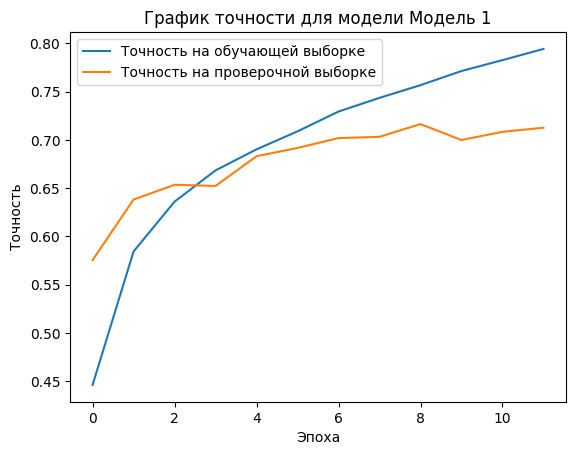

Модель: Модель 2, Точность: 0.6521


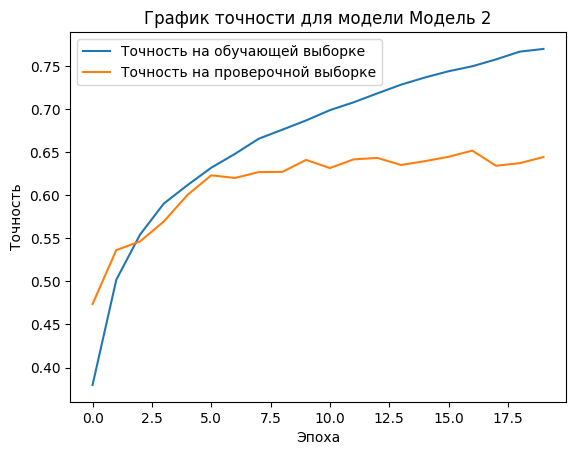

In [ ]:
for name, accuracy, history in results:
  print(f'Модель: {name}, Точность: {accuracy:.4f}')
  plt.plot(history.history['accuracy'], label='Точность на обучающей выборке')
  plt.plot(history.history['val_accuracy'], label='Точность на проверочной выборке')
  plt.xlabel('Эпоха')
  plt.ylabel('Точность')
  plt.title(f'График точности для модели {name}')
  plt.legend()
  plt.show()